<a href="https://colab.research.google.com/github/j0h4nM/ciencia_de_datos-/blob/main/Actividad_2_trabajo_de_fare_embarked_johan_lizcano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ANÁLISIS EXPLORATORIO DE DATOS - EDA
"Conjunto de técnicas estadísticas cuyo objetivo es explorar, describir y resumir la naturaleza de los datos y comprender las relaciones existentes entre las variables de interés, maximizando la comprensión del conjunto de datos".

El EDA, de acuoerdo a Wickman y Çetinkaya-Rundel y Grolemund (2023) propone seguir los siguientes pasos:
1. **Realizar un análisis descriptivo de las variables**, con el fin de obtener una idea representativa de los datos.
2. **Re-ajustar tipos de variables** para que sean consistentes en el momento de realizar posteriores operaciones.
3. **Detectar y tratar datos ausentes**, que nos permitirá procesar adecuadamente las variables numéricas.
4. **Identificar datos atípicos y tratarlos de forma adecuada**. Esto mitigará la distorsión de futuros análisis estadísticos.
5. **Realizar un examen numérico y gráfico de las relaciones entre variables analizadas para determinar el grado de correlación entre ellas**

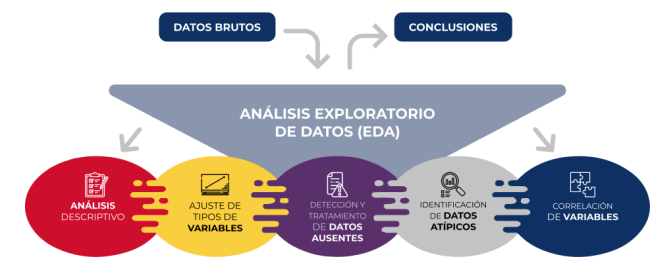

##TALLER
Para ello, realizaremos un ejercicio en el cuál se analizará estudiaremos el dataset de titanic con el fin de poder responder a la siguiente pregunta: Podría Jack sobrevivir al hundimiento del TITANIC (de acuerdo a lo arrojado por los datos).

Para ello, descargue el dataset de titanic y realice un análisis descriptivo de todos los datos posibles del dataset (emplee los conceptos ya aprendidos en el primer corte.

###ANÁLISIS DESCRIPTIVO

In [ ]:
#Realice aquí su análisis descriptivo y emita sus conclusiones. Emplee todas las gráficas necesarias para poder emitir conclusiones con respecto a la tripulación del titanic.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("https://raw.githubusercontent.com/nt246/NTRES-6100-data-science/master/datasets/Titanic.csv")

Cómo podemos llenar los datos nulos?

Los datos disponibles son suficientes para generar un modelo mínimo viable?

### AJUSTES DE VARIABLES
Observemos el dataset de TITANIC:
* La presentación de todas las variables es la adecuada? Si su respuesta es si, qué tipo de variable posee la feature Age?
AGE es una variable de tipo float. Queremos que sea de tipo entero. Genere un nuevo dataset con la característica AGE de tipo entero. Así mismo, revise que las características Survived y Pclass sean numéricas.

### DETECCIÓN Y TRATAMIENTO DE DATOS AUSENTES
Como se pudo observar, el dataset de titanic posee una cantidad de (llenar aquí con la información) datos nulos, los cuáles deben ser tratados para un posterior entendimiento de los datos. Ejecute las siguientes líneas de código para arreglar el dataset y explica los resultados obtenidos.

In [ ]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
total=df.isnull().sum().sort_values(ascending=False)
total

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


In [ ]:
df.isnull().count()

,0
PassengerId,891
Survived,891
Pclass,891
Name,891
Sex,891
Age,891
SibSp,891
Parch,891
Ticket,891
Fare,891


In [ ]:
porcentajes=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
porcentajes

,0
Cabin,0.771044
Age,0.198653
Embarked,0.002245
PassengerId,0.000000
Name,0.000000
Pclass,0.000000
Survived,0.000000
Sex,0.000000
Parch,0.000000
SibSp,0.000000


In [ ]:
datos_perdidos=pd.concat([total,porcentajes],axis=1,keys=['Total','Porcentaje'])
datos_perdidos

,Total,Porcentaje
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Name,0,0.000000
Pclass,0,0.000000
Survived,0,0.000000
Sex,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000


In [ ]:
def plot_learning_curve(estimator,title,X,y,xlim=None,cv=None,n_jobs=1,train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Ejemplos de entrenamiento")
    plt.ylabel("Puntuación de validación")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Puntuación de entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Puntuación de validación")

    plt.legend(loc="best")
    return plt


Explique línea por línea qué está haciendo la función plot_learning_curve (responda preguntas como, qué tipo de datos solicita, qué otros valores se pueden usar, cuál es su uso, etc.). También explique la gráfica obtenida.

El resultado de esta actividad debe subirse a GITHUB el día 7 de abril/2025 a las 5:00pm.
**Actividades subidas en la franja de 5:01pm a 11:59pm será evaluado sobre 4.0.**

**Actividades subidas después del 7 de abril pero antes de la siguiente clase serán evaluadas sobre 3.0.**


##Para investigar:
Formule una estrategia que permita llenar los datos nulos del dataset y empléelo. Ejemplo: cómo podría llenar los datos nulos de edades?

##Mi solución

In [ ]:
import pandas as pd

In [ ]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

In [ ]:
notas=pd.read_csv("https://raw.githubusercontent.com/nt246/NTRES-6100-data-science/master/datasets/Notes.csv")
notas

,Variable,Definition,Key
0,PassengerId,Passenger ID,NaN
1,Survival,Survival,"0 = No, 1 = Yes"
2,Pclass,Ticket class,"1 = 1st, 2 = 2nd, 3 = 3rd"
3,Name,Pasenger name,NaN
4,Sex,Sex,NaN
5,Age,Age in years,NaN
6,Sibsp,# of siblings / spouses aboard the Titanic,NaN
7,Parch,# of parents / children aboard the Titanic,NaN
8,Ticket,Ticket number,NaN
9,Fare,Passenger fare,NaN


Diccionario de datos:
* Survived:0=No, 1=Sí
* sibsp= # de hermanos / esposos que embarcaron el Titanic
* parch: # de padres / niños que abordaron el Titanic
* ticket: Número del tiquete
* embarked: Puerto de embarcación C = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

##1. Analizando la relación entre las features con la probabilidad de supervivencia / mortalidad del TITANIC

In [ ]:
def bar_chart(feature):
    survived = df[df['Survived']==1][feature].value_counts()
    dead =  df[df['Survived']==0][feature].value_counts()
    test = pd.DataFrame([survived,dead])
    test.index = ['Sobrevivientes','Fallecidos']
    test.plot(kind='bar',stacked=True, figsize=(10,5))

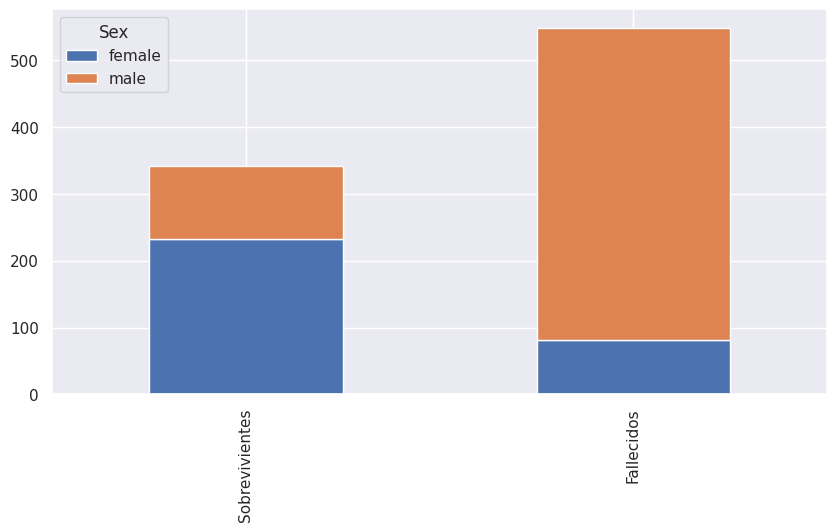

In [ ]:
bar_chart('Sex')

La gráfica señala que las **mujeres** sobrevivieron más que los **hombres**

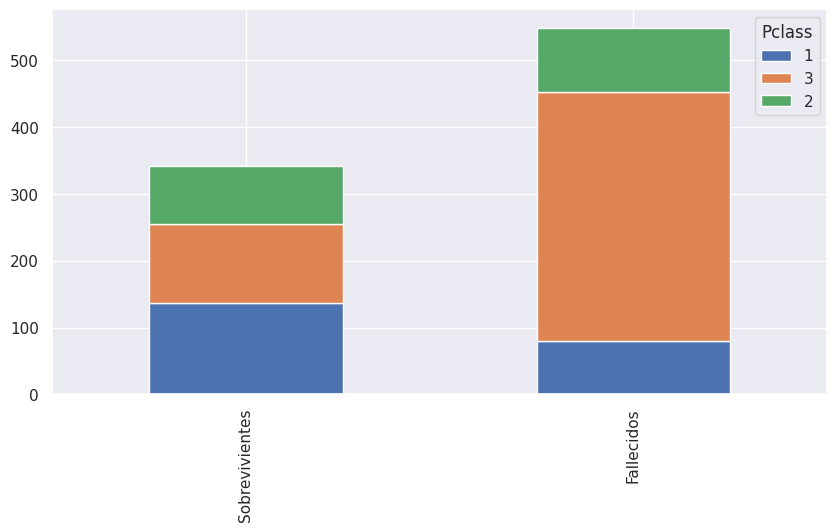

In [ ]:
bar_chart('Pclass')

La gráfica señala que la **clase 1** sobrevieron más que las **otras clases**

La gráfica señala que la **clase 3** fallecieron más que las **otras clases**

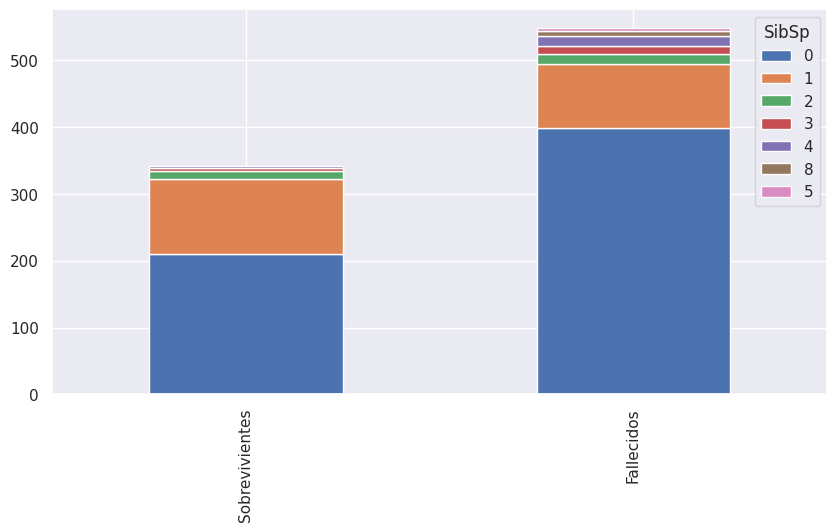

In [ ]:
bar_chart('SibSp')

La gráfica señala que **una persona casada o con hermanos** tuvo más probabilidad de supervivencia que una persona **soltera**.

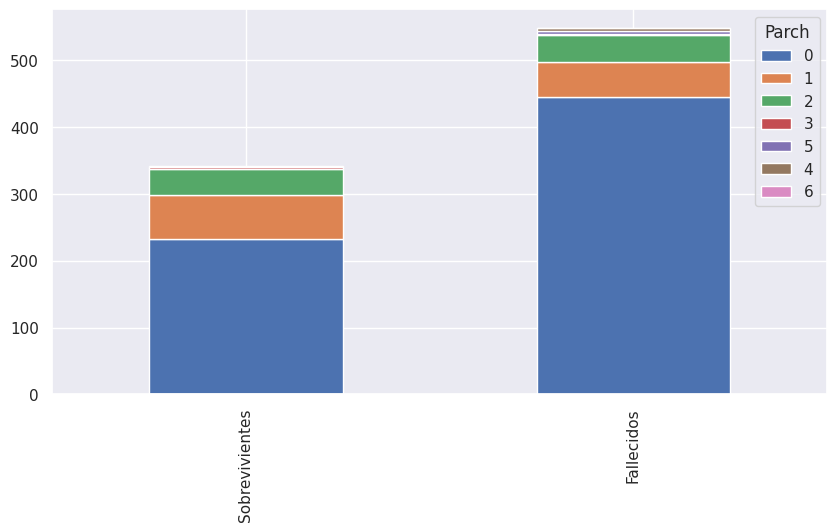

In [ ]:
bar_chart('Parch')

La gráfica muestra que **una persona con dos o más hijos** tuvo más probabilidad de supervivencia que una persona **que abordó sola**.

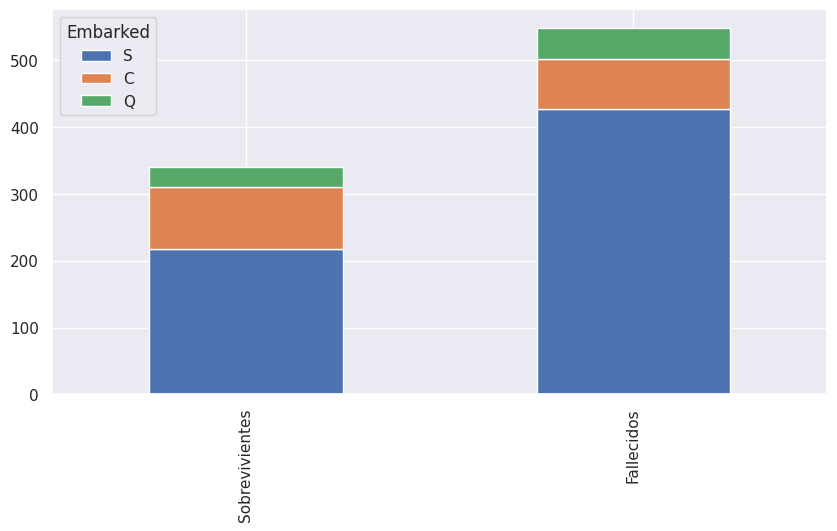

In [ ]:
bar_chart('Embarked')

La gráfica confirma que:
* **Una persona que abordó desde C** tuvo una ligera probabilidad de sobrevivir.
* **Una persona que abordó desde Q o S** probablemente murió.

#Ingenieria de características
Es el proceso de usar el dominio de conocimiento de los datos para crear nuevas características (feature vectors) que logre que los algoritmos de machine learning funcionen correctamente.

Feature vector es un vector n-dimensional que representa un objeto. Muchos algoritmos en machine learning requieren una representación numérica de los objetos, ya que tales representaciones facilitan el procesamiento y el análisis estadístico.

## Cómo se hundió el titanic?
De acuerdo a lo conocido, por la proa del barco donde estaban las habitaciones de tercera clase

Conclusión, Pclass es la característica clave para el clasificador

In [ ]:
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##2. Creando nuevos vector features

In [ ]:
def extract_title(data):
    titles=data["Name"].str.extract('([A-Za-z]+)\.',expand=True)
    return titles

In [ ]:
df["Title"]=extract_title(df)

In [ ]:
df["Title"].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


##2.1 Creando un mapeo de los títulos
Para ello, reemplazaremos los títulos encontrados por los siguientes valores:
* Mr: 0
* Miss: 1
* Mrs = 2
* Otros = 3

In [ ]:
def replace_titles(data):
  title_mapping = {"Mr": "Señor", "Miss": 'Señorita', "Mrs": "Señora"}
  data['Title'] = data['Title'].map(title_mapping).fillna("Otros")
  return data

In [ ]:
df=replace_titles(df)
df[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Señor
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Señora
2,"Heikkinen, Miss. Laina",Señorita
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Señora
4,"Allen, Mr. William Henry",Señor


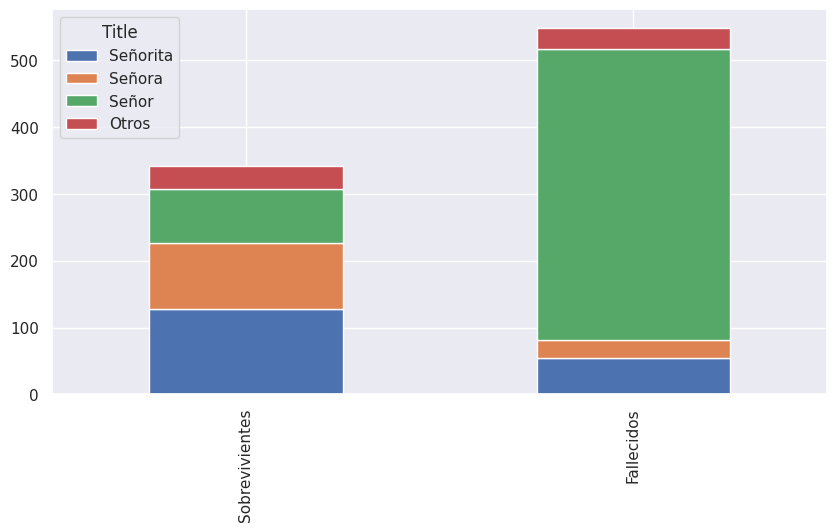

In [ ]:
bar_chart("Title")

In [ ]:
#Eliminando información innecesaria del dataset
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,Señor
1,2,1,1,female,38.0,1,0,71.2833,C,Señora
2,3,1,3,female,26.0,0,0,7.9250,S,Señorita
3,4,1,1,female,35.0,1,0,53.1000,S,Señora
4,5,0,3,male,35.0,0,0,8.0500,S,Señor


##2.3 Analizando el sexo

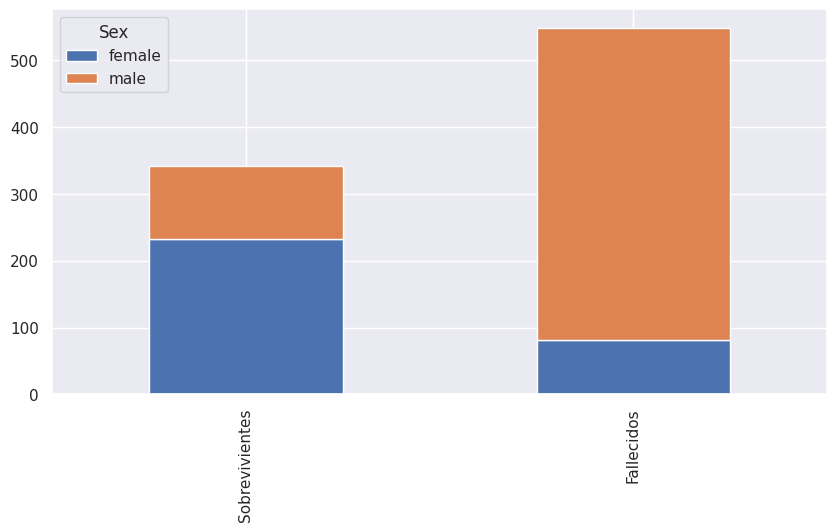

In [ ]:
bar_chart("Sex")

##2.4 EDAD
###2.4.1 Arreglando las edades faltantes
Vamos a emplear la media de los títlulos para llenar las edades faltantes.

In [ ]:
title_age_means = df.groupby('Title')['Age'].mean()
title_age_means

,Age
Title,
Otros,20.430161
Señor,32.368090
Señora,35.898148
Señorita,21.773973


In [ ]:
df['Age'] = df.apply(lambda row: title_age_means[row['Title']] if pd.isnull(row['Age']) else row['Age'], axis=1)

In [ ]:
df[['Title', 'Age']].head(30)

,Title,Age
0,Señor,22.000000
1,Señora,38.000000
2,Señorita,26.000000
3,Señora,35.000000
4,Señor,35.000000
5,Señor,32.368090
6,Señor,54.000000
7,Otros,2.000000
8,Señora,27.000000
9,Señora,14.000000


In [ ]:
#df["Age"].fillna(df.groupby("Title")["Age"].transform("median"), inplace=True)

In [ ]:
#df.sample(30)
#df.groupby("Title")["Age"].transform("median")

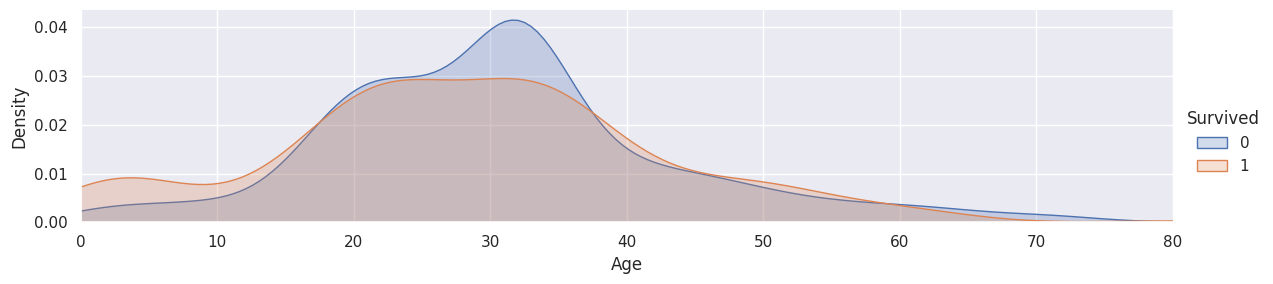

In [ ]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()

plt.show()

(0.0, 20.0)

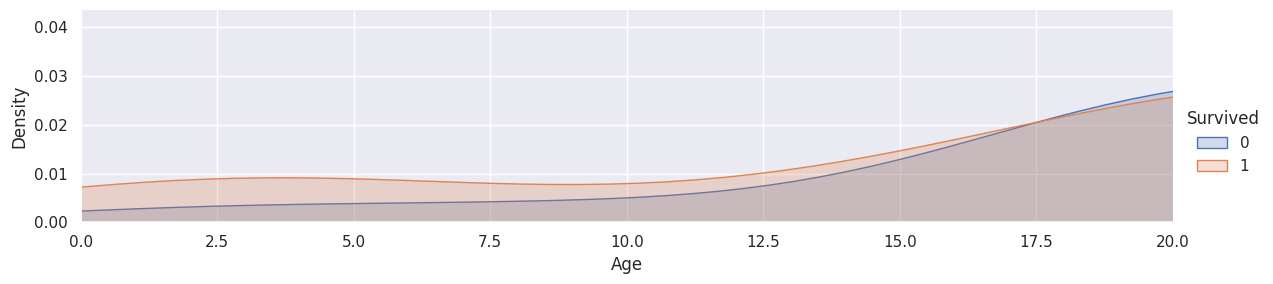

In [ ]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

(20.0, 30.0)

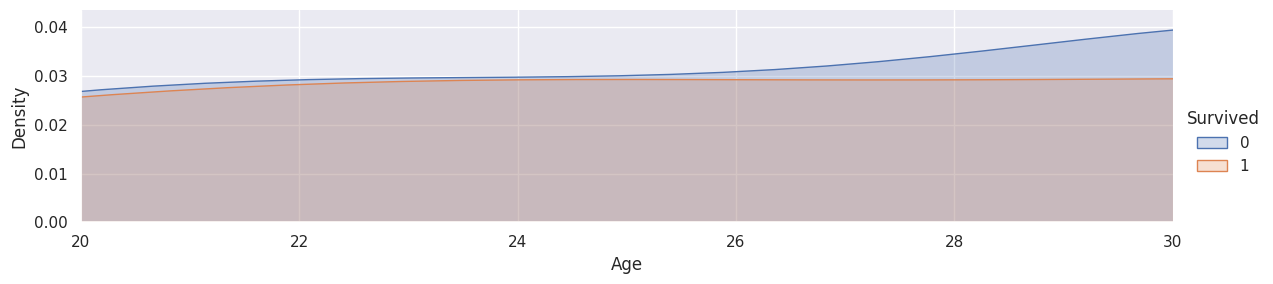

In [ ]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(20, 30)

(30.0, 40.0)

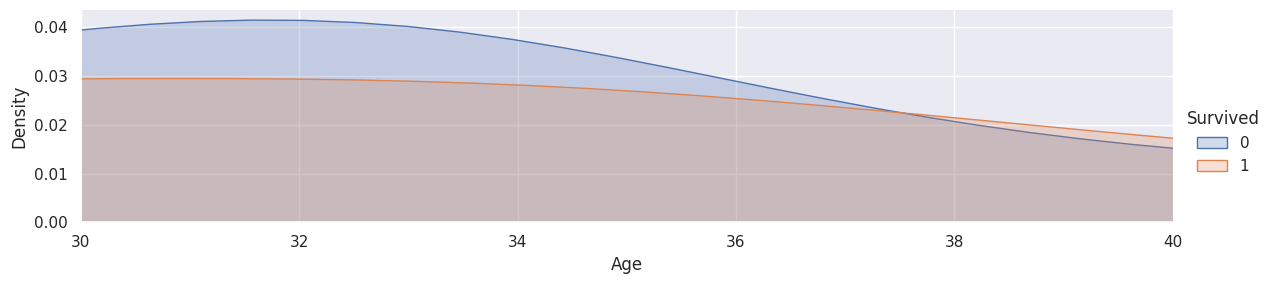

In [ ]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(30, 40)

(40.0, 60.0)

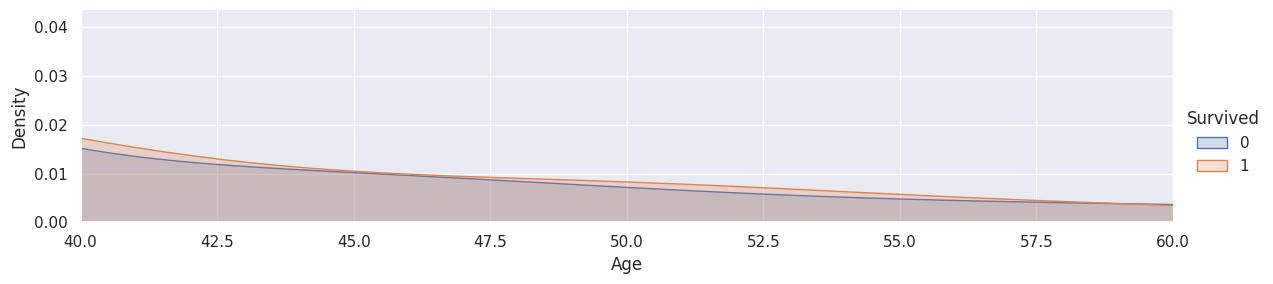

In [ ]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)

(60.0, 80.0)

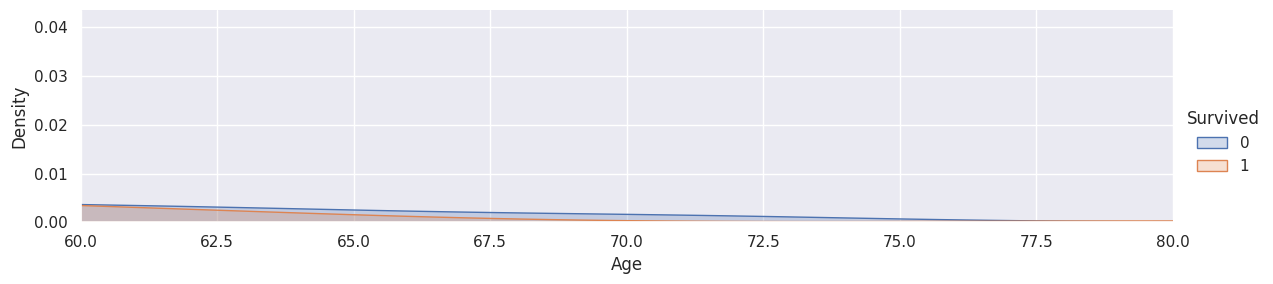

In [ ]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(60)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
 9   Title        891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


###2.4.2 Binning
Es convertir una variable numérica a categórica, en este caso, la edad.

Mapeo del feature vector:
* niño: 0
* joven: 1
+ adulto: 2
* edad madura: 3
* edad avanzada : 4

In [ ]:
df['Age_Category'] = pd.cut(df['Age'], bins=[0, 16, 26, 36, 62, float('inf')], labels=[0, 1, 2, 3, 4], right=False)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_Category
0,1,0,3,male,22.0,1,0,7.2500,S,Señor,1
1,2,1,1,female,38.0,1,0,71.2833,C,Señora,3
2,3,1,3,female,26.0,0,0,7.9250,S,Señorita,2
3,4,1,1,female,35.0,1,0,53.1000,S,Señora,2
4,5,0,3,male,35.0,0,0,8.0500,S,Señor,2


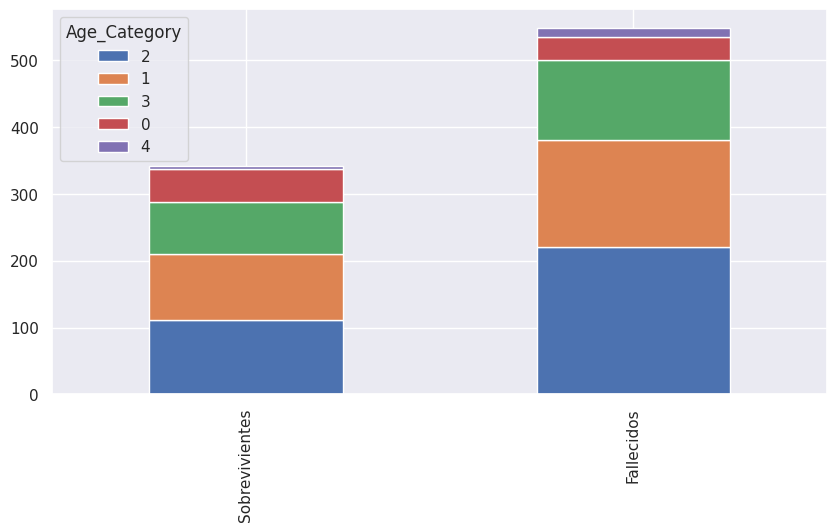

In [ ]:
bar_chart("Age_Category")

##Actividad 1
De acuerdo a lo aprendido, llenar los espacios perdidos de embarcamiento y tarifa. Sacar conclusiones y comparta sus resultados.

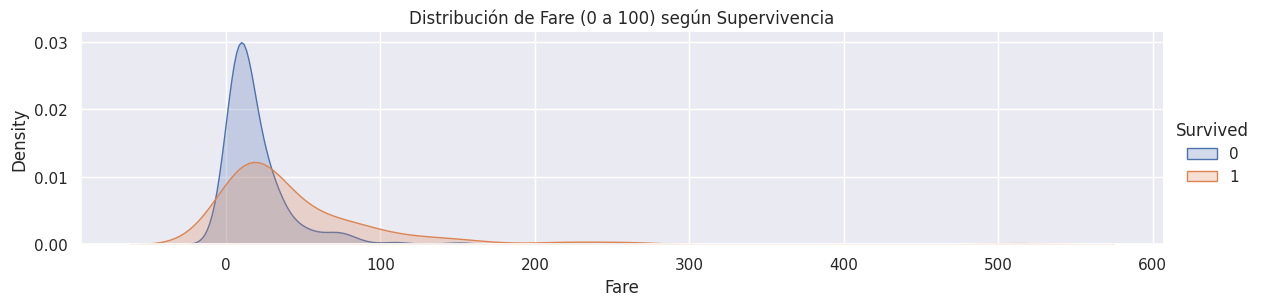

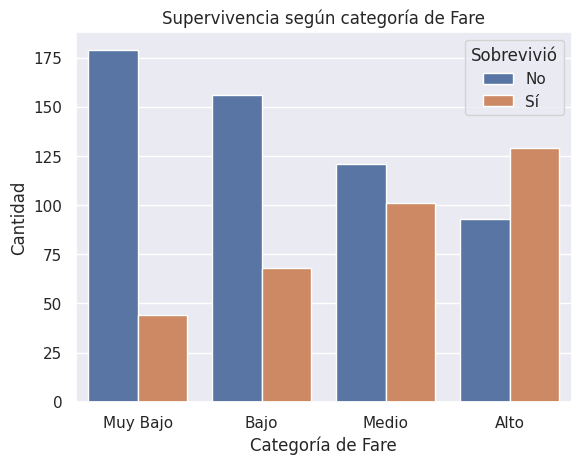

In [ ]:

facet = sns.FacetGrid(df, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', fill=True)
#facet.set(xlim=(0, 100))
facet.add_legend()
plt.title('Distribución de Fare (0 a 100) según Supervivencia')
plt.show()

df['Fare_Category'] = pd.qcut(df['Fare'], 4, labels=['Muy Bajo', 'Bajo', 'Medio', 'Alto'])

sns.countplot(x='Fare_Category', hue='Survived', data=df)
plt.title('Supervivencia según categoría de Fare')
plt.xlabel('Categoría de Fare')
plt.ylabel('Cantidad')
plt.legend(title='Sobrevivió', labels=['No', 'Sí'])
plt.show()




##EMBARCACION

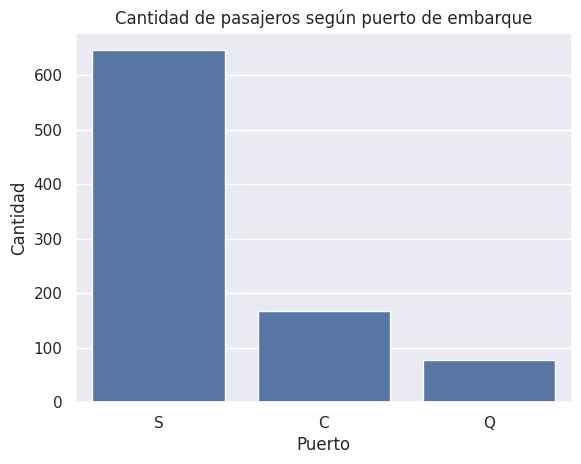

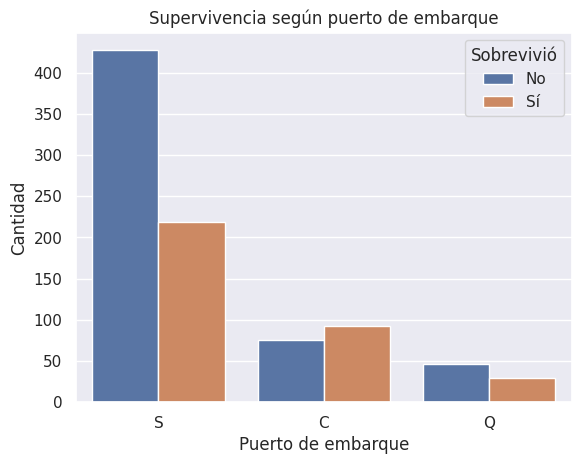

In [ ]:

df['Embarked'].isnull().sum()

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

sns.countplot(x='Embarked', data=df)
plt.title('Cantidad de pasajeros según puerto de embarque')
plt.xlabel('Puerto')
plt.ylabel('Cantidad')
plt.show()

sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Supervivencia según puerto de embarque')
plt.xlabel('Puerto de embarque')
plt.ylabel('Cantidad')
plt.legend(title='Sobrevivió', labels=['No', 'Sí'])
plt.show()


##conclusiones

# TARIFA

1. Las personas que pagaron más por su pasaje —probablemente en clases más altas— tuvieron más chances de sobrevivir. Esto puede estar relacionado con su ubicación en el barco y el acceso más rápido a los botes salvavidas.

2. En cambio, la mayoría de los pasajeros que pagaron tarifas bajas no lograron sobrevivir. Esto muestra una clara diferencia en las oportunidades de supervivencia según el nivel económico.

#EMBARCACION

1. La mayor parte de los pasajeros subieron al Titanic desde el puerto de Southampton, pero curiosamente, quienes embarcaron desde Cherburgo fueron los que más sobrevivieron. Es posible que en ese puerto hayan subido más pasajeros de primera clase.

2. Aunque el puerto en sí no define quién sobrevive y quién no, sí refleja ciertos patrones: dependiendo de dónde embarcaron, los pasajeros tenían distintas condiciones que podrían haber influido en su destino.

###ACTIVIDAD 2


In [113]:
# 1. Datos generales y tasa global de supervivencia
print("Total de pasajeros y tripulantes:", len(df))
print("Datos disponibles:", df.shape[0])

sobrevivientes = df[df['Survived'] == 1].shape[0]
no_sobrevivientes = df[df['Survived'] == 0].shape[0]
tasa_supervivencia = sobrevivientes / (sobrevivientes + no_sobrevivientes)

print("Sobrevivientes:", sobrevivientes)
print("No sobrevivientes:", no_sobrevivientes)
print("Tasa global de supervivencia: {:.2%}".format(tasa_supervivencia))

Total de pasajeros y tripulantes: 891
Datos disponibles: 891
Sobrevivientes: 342
No sobrevivientes: 549
Tasa global de supervivencia: 38.38%


#En el dataset hay 891 pasajeros. Sobrevivieron 342 personas (~38,38%). La mayoría no sobrevivió.

In [114]:
# 2. Pasajeros por sexo y clase de billete
sex_counts = df['Sex'].value_counts()
print(sex_counts)

sexo_clase = pd.crosstab(df['Pclass'], df['Sex'])
print(sexo_clase)

Sex
male      577
female    314
Name: count, dtype: int64
Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


#Había 577 hombres y 314 mujeres.En todas las clases, había más hombres que mujeres.

        sum  count  Survival Rate (%)
Sex                                  
female  233    314          74.203822
male    109    577          18.890815


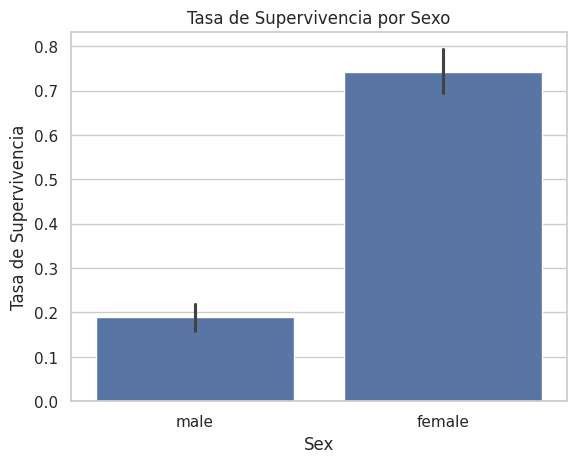

In [115]:
#3. ¿Cuántos hombres y mujeres sobrevivieron? ¿Tasa de supervivencia por sexo?
survival_sex = df.groupby('Sex')['Survived'].agg(['sum', 'count'])
survival_sex['Survival Rate (%)'] = survival_sex['sum'] / survival_sex['count'] * 100

print(survival_sex)

sns.barplot(data=df, x='Sex', y='Survived', estimator=np.mean)
plt.title("Tasa de Supervivencia por Sexo")
plt.ylabel("Tasa de Supervivencia")
plt.show()


#Las mujeres tenían una alta tasa de supervivencia (~74%), mientras que los hombres apenas ~18%.Se priorizó salvar a las mujeres.

Con edad disponible: 714, Faltan edad: 177


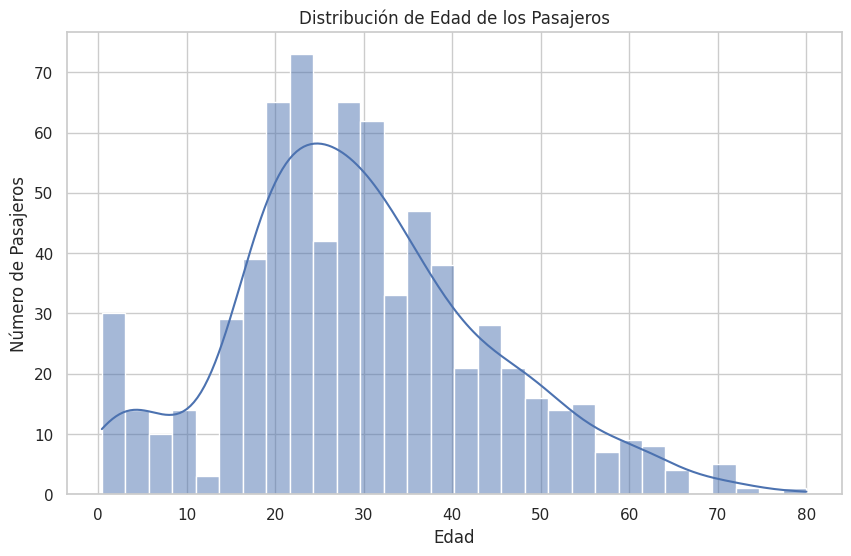

In [116]:
# 4. Información sobre edad
total_age_info = titanic['age'].count()
faltan_edad = titanic['age'].isna().sum()
print(f"Con edad disponible: {total_age_info}, Faltan edad: {faltan_edad}")


plt.figure(figsize=(10,6))
sns.histplot(titanic['age'].dropna(), kde=True, bins=30)
plt.title('Distribución de Edad de los Pasajeros')
plt.xlabel('Edad')
plt.ylabel('Número de Pasajeros')
plt.show()


#De 891 pasajeros, 714 tienen edad conocida y 177 no.La mayoría de pasajeros tenía entre 20 y 40 años.

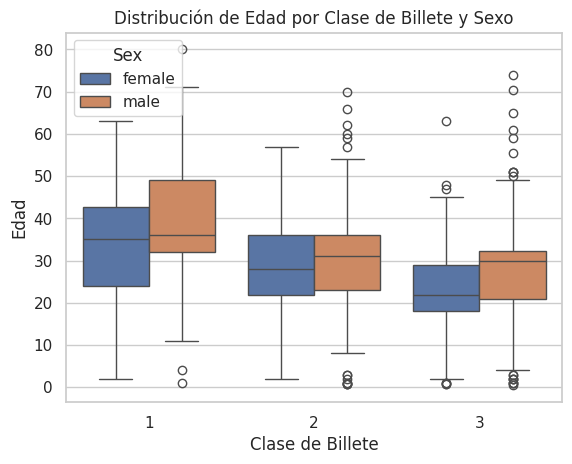

In [117]:
#5. ¿Distribución de edad por clase de billete y sexo?

sns.boxplot(data=df, x='Pclass', y='Age', hue='Sex')
plt.title('Distribución de Edad por Clase de Billete y Sexo')
plt.xlabel('Clase de Billete')
plt.ylabel('Edad')
plt.show()

#Los pasajeros de primera clase eran mayores en promedio.En tercera clase había más jóvenes y niños.

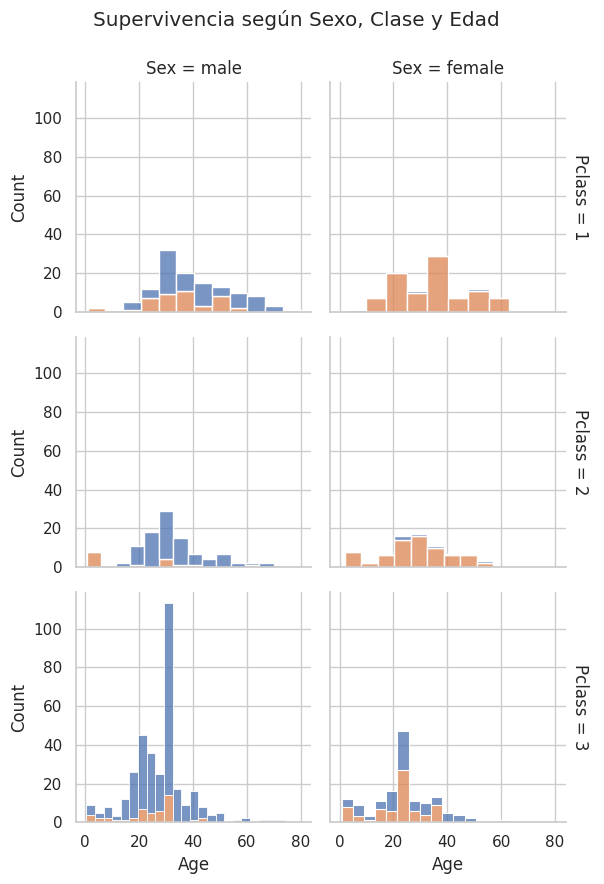

In [118]:
#6. ¿Cómo afectan sexo, clase y edad a la supervivencia?

g = sns.FacetGrid(df, col='Sex', row='Pclass', margin_titles=True)
g.map_dataframe(sns.histplot, x='Age', hue='Survived', multiple='stack')
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Supervivencia según Sexo, Clase y Edad')
plt.show()


#Mujeres, pasajeros jóvenes y de primera clase tenían más posibilidades de sobrevivir.

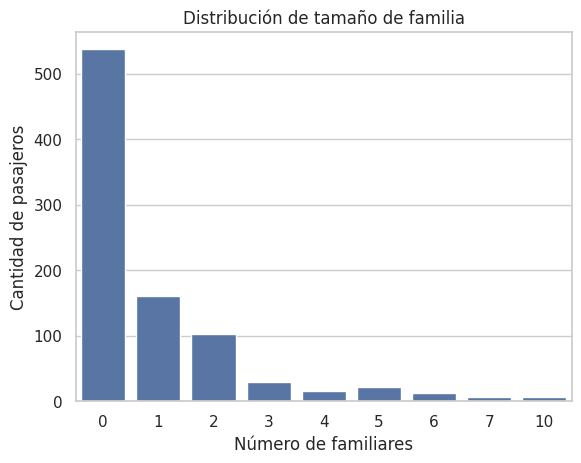

In [119]:
#7. ¿Viajan solos o en familia?

df['FamilySize'] = df['SibSp'] + df['Parch']

sns.countplot(data=df, x='FamilySize')
plt.title('Distribución de tamaño de familia')
plt.xlabel('Número de familiares')
plt.ylabel('Cantidad de pasajeros')
plt.show()


#La mayoría de pasajeros viajaba solo

In [120]:
#8. ¿Qué clase de billete usaban las familias numerosas?

familias_numerosas = df[df['FamilySize'] >= 3]


clase_familias = familias_numerosas['Pclass'].value_counts()

print(clase_familias)


Pclass
3    63
2    15
1    13
Name: count, dtype: int64


#Las familias numerosas viajaban principalmente en tercera clase.

In [121]:
# Punto 9

df['GroupSize'] = df['FamilySize'] + 1

df['Fare_per_person'] = df['Fare'] / df['GroupSize']

print(df[['PassengerId', 'Fare', 'FamilySize', 'GroupSize', 'Fare_per_person']].head())


   PassengerId     Fare  FamilySize  GroupSize  Fare_per_person
0            1   7.2500           1          2          3.62500
1            2  71.2833           1          2         35.64165
2            3   7.9250           0          1          7.92500
3            4  53.1000           1          2         26.55000
4            5   8.0500           0          1          8.05000


#La tarifa inicial era para grupos, no por persona. Calculando la tarifa media por pasajero, corregimos esta distorsión y obtenemos una visión más realista de lo que pagaba cada individuo.

        count       mean        std  min      25%      50%    75%       max
Pclass                                                                     
1       216.0  52.936943  60.926142  0.0  26.5500  33.7604  52.00  512.3292
2       184.0  12.698832   8.049364  0.0  10.5000  13.0000  13.00   73.5000
3       491.0   8.094756   6.330092  0.0   6.7375   7.7500   8.05   56.4958


<ipython-input-122-092d3a9bd612>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Fare_per_person', data=df, palette="Set3")


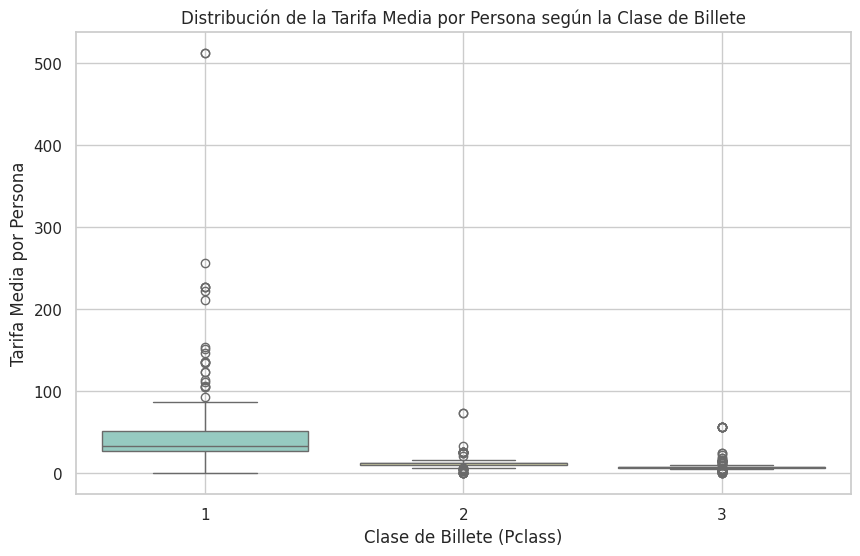

In [122]:
# Punto 10

fare_distribution = df.groupby('Pclass')['Fare_per_person'].describe()
print(fare_distribution)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass', y='Fare_per_person', data=df, palette="Set3")
plt.title('Distribución de la Tarifa Media por Persona según la Clase de Billete')
plt.xlabel('Clase de Billete (Pclass)')
plt.ylabel('Tarifa Media por Persona')
plt.grid(True)
plt.show()


#La tarifa media por persona disminuye significativamente de primera a tercera clase, evidenciando una marcada diferencia económica entre clases a bordo del Titanic.